## Missing Data Experiment
I am curious if you can train a generative model to learn the conditional distributions across categories, and replace missing data based on where the example is in the other distirbutions. For example,there is a relationship between bmi and blood glucose, can we use that relationship to fill in missing glucose data with bmi data? I am going to training a model to generate the  

##### EDA
I will begin with some EDA and see what I found out about the data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import umap
from sklearn_extra.cluster import KMedoids
import gower


plt.style.use('bmh')
sns.set_theme()

In [2]:
file_location = "/home/nolz/Documents/Development/apparatus-doctrina/stroke_data_analysis/data/stroke.csv"
stroke_data = pd.read_csv(file_location)
#print(stroke_data.head())
#print(stroke_data.shape)

In [60]:
# replace categorical variables with ordinal ones
stroke_data["gender"].replace(["Male", "Female", "Other"], [1,2,3], inplace=True)
stroke_data["ever_married"].replace(["Yes", "No"], [1,0], inplace=True)
stroke_data["Residence_type"].replace(["Urban", "Rural"], [1,2], inplace=True)
stroke_data["smoking_status"].replace(["formerly smoked", "never smoked", "smokes", 
                                       "Unknown"], [2, 0, 1, 3], inplace=True)
stroke_data["work_type"].replace(["Private", "Self-employed", "Govt_job", "children",
                                 'Never_worked'],
                                 [1,2,3,4,5], inplace=True)

print(stroke_data.head())


      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          1   
1  51676       2  61.0             0              0             1          2   
2  31112       1  80.0             0              1             1          1   
3  60182       2  49.0             0              0             1          1   
4   1665       2  79.0             1              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               2       1  
1               2             202.21   NaN               0       1  
2               2             105.92  32.5               0       1  
3               1             171.23  34.4               1       1  
4               2             174.12  24.0               0       1  


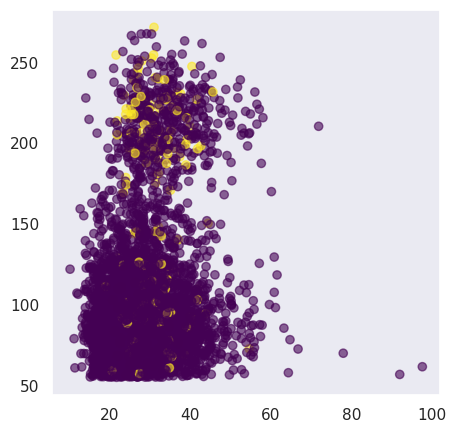

In [4]:
# visualising some data 

f, ax = plt.subplots()
f.set_size_inches(5,5)
ax.grid()

ax.scatter(stroke_data["bmi"], stroke_data["avg_glucose_level"], 
           c=stroke_data["heart_disease"], cmap="viridis", alpha=0.6)

plt.show()
plt.close()

In [51]:
uniqs, counts = np.unique(stroke_data.iloc[:,11], return_counts=True)
print(uniqs, counts)

[0 1] [4861  249]


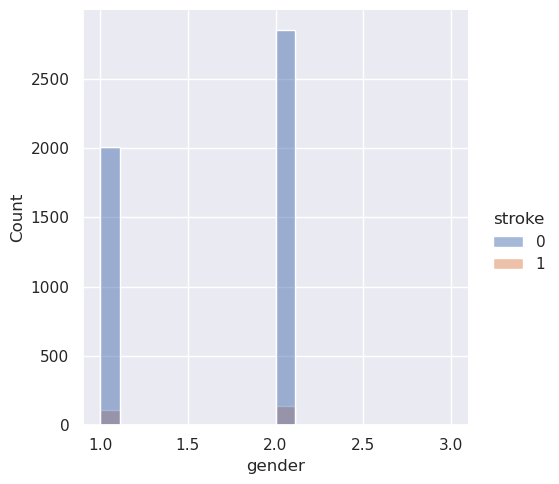

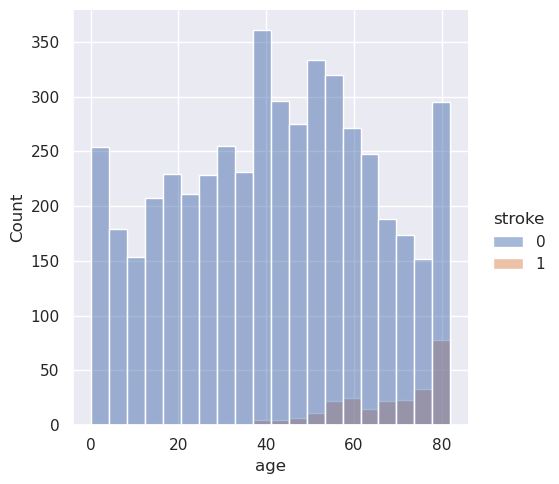

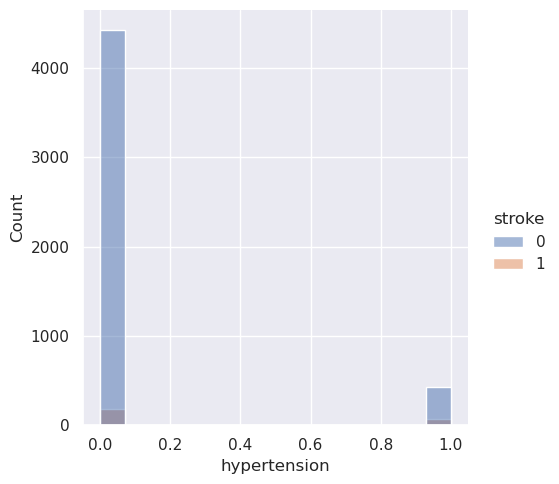

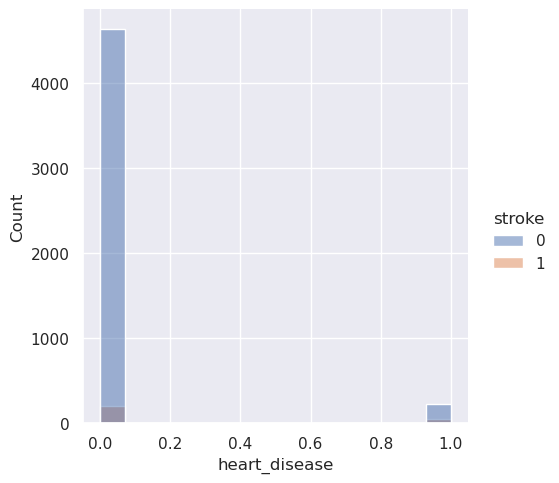

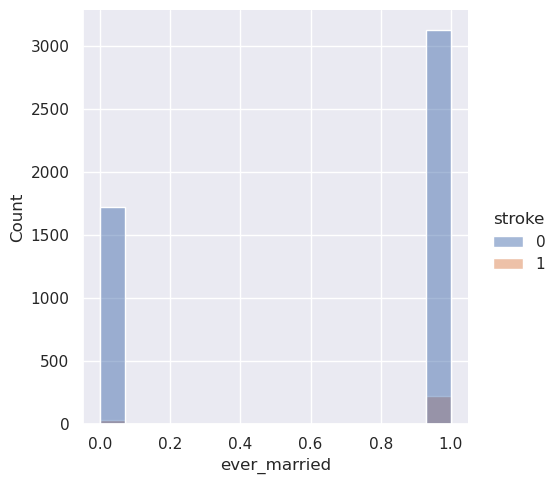

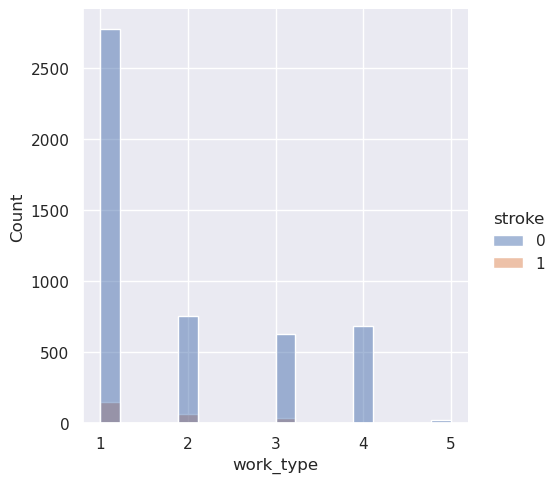

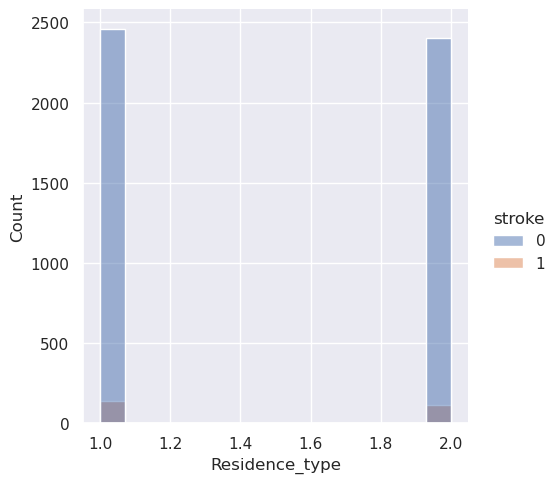

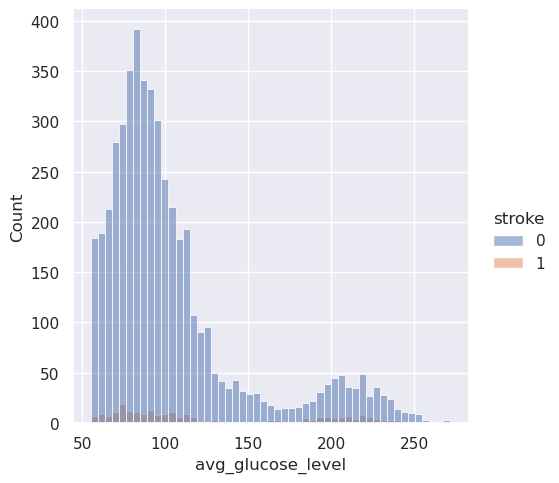

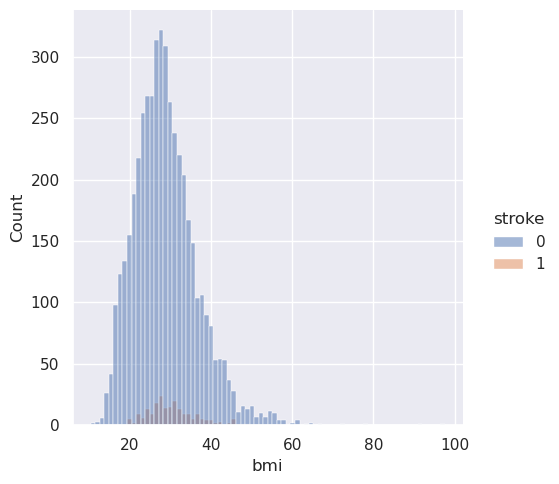

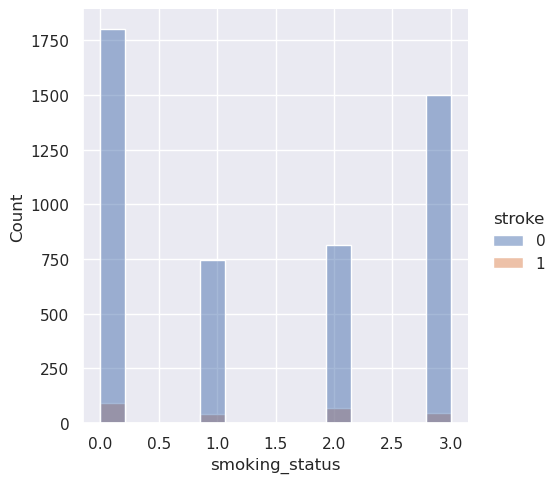

In [52]:
for col,d_type in zip(stroke_data.columns, stroke_data.dtypes):
    #print(type(d_type))
    if col == "stroke" or col == "id":
        continue
        
    sns.displot(stroke_data, x=col, hue="stroke")


## Unsupervised Clustering
##### I am interested to see if clustering algorithms will automatically seperate the stroke from non stroke patients

In [63]:
#Remove the ID column
X = np.asarray(stroke_data.iloc[:,1:12].dropna())
uniqs, counts = np.unique(X[:,10], return_counts=True)
print(uniqs, counts)

[0. 1.] [4700  209]


In [64]:
X

array([[ 1. , 67. ,  0. , ..., 36.6,  2. ,  1. ],
       [ 1. , 80. ,  0. , ..., 32.5,  0. ,  1. ],
       [ 2. , 49. ,  0. , ..., 34.4,  1. ,  1. ],
       ...,
       [ 2. , 35. ,  0. , ..., 30.6,  0. ,  0. ],
       [ 1. , 51. ,  0. , ..., 25.6,  2. ,  0. ],
       [ 2. , 44. ,  0. , ..., 26.2,  3. ,  0. ]])

In [75]:
gower_distance = gower.gower_matrix(X)

reducer = umap.UMAP(random_state=20, min_dist=1, n_neighbors=200)
embedding = reducer.fit_transform(gower_distance)

['blue' 'red'] [4700  209]


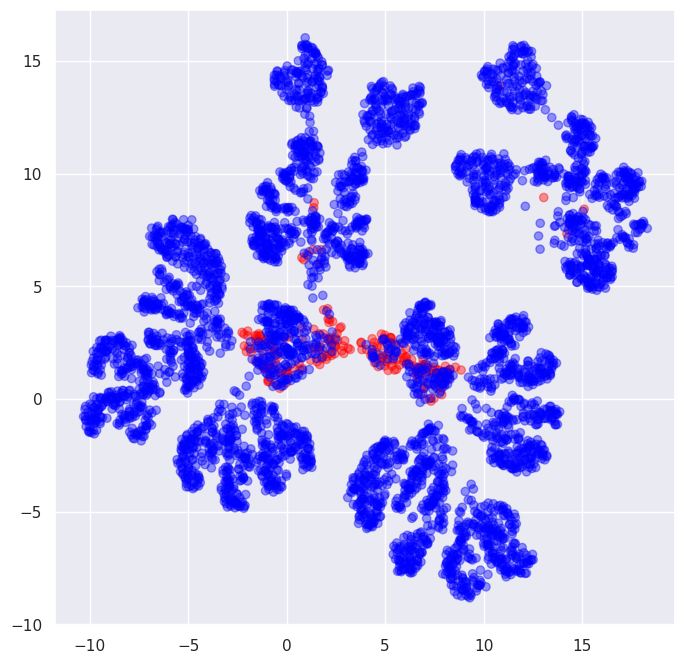

In [77]:
colors = ["blue" if X[i][-1] == 0 else "red" for i,v in enumerate(embedding)]

uniqs, counts = np.unique(np.asarray(colors), return_counts=True)
print(uniqs, counts)

f,ax = plt.subplots()
f.set_size_inches(8,8)
ax.grid(True)
ax.scatter(embedding[:,0], embedding[:,1], c=colors, alpha=0.4)
plt.show()
plt.close()

In [38]:

dist_matrix = gower.gower_matrix(X)

clusters = (KMedoids(n_clusters=2, 
                           metric='precomputed',
                           method='pam', init='build', 
                           max_iter=300, 
                           random_state=3)
            .fit(dist_matrix)


clusters

SyntaxError: invalid syntax (1166828315.py, line 14)

In [39]:
clusters

array([0, 0, 0, ..., 0, 0, 0])